Base on  [BobaZooba hw](https://github.com/BobaZooba/DeepNLP/blob/2020/Week%203/Homework%202.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/dl_hw2')

Mounted at /content/drive


In [2]:
import math
import numpy as np

from tqdm import tqdm

import torch

import zipfile

import seaborn as sns

from data import Downloader, Parser

### Загружаем файл с эмбеддингами для английского языка
Они нам понадобятся чуть позже.  
Для других языков можете найти здесь: https://fasttext.cc/docs/en/crawl-vectors.html

In [3]:
# раскомментируйте и скачайте
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

--2024-10-27 19:38:20--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.121, 108.157.254.124, 108.157.254.102, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: ‘wiki-news-300d-1M.vec.zip’

wiki-news-300d-1M.v 100%[===================>] 650.22M   200MB/s    in 3.2s    

2024-10-27 19:38:24 (200 MB/s) - ‘wiki-news-300d-1M.vec.zip’ saved [681808098/681808098]



In [4]:
# путь к данным
data_path = './data/'

### Читалка данные
Не стоит вдаваться в подробности, просто эта штука скачивает данные, затем парсит и делает из них три датасета:
- тренировочный
- валидационный
- неразмеченный

Неразмеченные данные необазятельны, но могут вам понадобиться, например, для языковой модели или улучшения эмбеддингов.

In [5]:
downloader = Downloader(data_path=data_path)

In [6]:
downloader.run()

multiple: 100%|██████████| 17/17 [00:46<00:00,  2.72s/it]


In [7]:
parser = Parser(data_path=data_path)

In [8]:
unlabeled, train, valid = parser.run()

Reading: 100%|██████████| 38/38 [02:48<00:00,  4.45s/it]


### Посмотрим на датасеты

In [9]:
unlabeled

,question,response
0,are there any other roofs? our little dog jump...,"unfortunately, no this is the only roof there ..."
1,do they fit the revlon,i don't have a revlon and they didn't fit
2,i just bought this and i have no idea what tha...,"it is for use on your touch screen, like inste..."
3,does this come with the tummy time pillow?,"yes, it does. but it's not worth $70. the fi..."
4,where can i find replacement suction cups????,"hi reiner,you may want to click on this link f..."
...,...,...
137275,will these fit well on a older modle giant rin...,"yes, i would suspect the bars would fit so lon..."
137276,will the rear camera work or is it covered by ...,yes the rear camera worked. it works well in m...
137277,"why is the average cmf 4, but load is 24 cmf? ...",i would say the average is more like 9 cfm for...
137278,it does not work. i tried to put in larger por...,this worked fine for me. make sure nothing is ...


In [10]:
train

,question,response,category
0,are the filters reuseable? i'm not sure i want...,i've been rinsing mine out but i really think ...,pet supplies
1,will this charge both galaxy s4 and iphone 3gs...,"yes, it will not only charge both but also cha...",cell phones and accessories
2,"we treat ""wet"" (cheese or meat). is the insid...",yes it can be cleaned pretty easily...it's lik...,pet supplies
3,received my base/top coat today. based on thw...,i honestly have never paid attention to the sk...,beauty
4,i'm just getting into nooks and crannies. i wa...,its a great hands free lamp.good quality,sports and outdoors
...,...,...,...
249995,does this case interfere with the touch input ...,it does not for us it works perfectly fine.,cell phones and accessories
249996,can the hooks by reversed,no they cannot be reversed.,sports and outdoors
249997,is this the type that will fit the graco duogl...,yes. classic connect fits with other classic c...,baby
249998,got it to work a couple of times after fiddlin...,not sure why you are fiddling with the battery...,automotive


In [11]:
valid

,question,response,category
0,lcd screen i would like to know if it works fo...,"hi, yes it works for t-mobile phone thanks.",cell phones and accessories
1,"i have a 4-1/2 inch lug pattern &amp; a 3"" cen...",great buy. i would give them a 10,automotive
2,do these phone have long distance,the service depends on the sim card you put in...,cell phones and accessories
3,does it come with a 12mm adapter?,it does include a: m12x1.75 to 1/8-27 npt fema...,automotive
4,are these beans whole or split?,ours were whole.,grocery and gourmet food
...,...,...,...
49995,whats the widest tire this bike can use?,no sure. i have not install anything besides w...,sports and outdoors
49996,has it warranty? has it warranty?,i'm interested in buying this phone as a gift ...,cell phones and accessories
49997,had a tough time getting the original battery ...,my battery was slidining in nd out freely. loo...,automotive
49998,do the bars move to the music? or do they just...,"yes they move to the music, but not like a sce...",cell phones and accessories


## Задача
Классифицировать поле question в одну из категорий в поле category.  
Это данные с сервиса Amazon QA, то есть такой сервис, на котором можно задать вопрос и получить ответ от других пользователей.

Идея задачи такая: давайте поможем клиенту определить в какую категорию выложить его вопрос, чтобы быстрее получить максимально релевантный ответ.

### Перевод класса в индекс
Мы сделаем некоторый маппер, который текст класса переводит в конкретный уникальный индекс. Нам это понадобиться, потому что наша
модель работает не напрямую с классом, а с его индексом.

In [12]:
# проверим, что в трейне и валидации одинаковые категории
set(train.category.unique().tolist()) == set(valid.category.unique().tolist())

True

In [13]:
unique_categories = set(train.category.unique().tolist() + valid.category.unique().tolist())

In [14]:
category2index = {category: index for index, category in enumerate(unique_categories)}

In [15]:
category2index

{'automotive': 0,
 'office products': 1,
 'sports and outdoors': 2,
 'beauty': 3,
 'baby': 4,
 'pet supplies': 5,
 'cell phones and accessories': 6,
 'grocery and gourmet food': 7}

In [16]:
train['target'] = train.category.map(category2index)
valid['target'] = valid.category.map(category2index)

In [17]:
train

,question,response,category,target
0,are the filters reuseable? i'm not sure i want...,i've been rinsing mine out but i really think ...,pet supplies,5
1,will this charge both galaxy s4 and iphone 3gs...,"yes, it will not only charge both but also cha...",cell phones and accessories,6
2,"we treat ""wet"" (cheese or meat). is the insid...",yes it can be cleaned pretty easily...it's lik...,pet supplies,5
3,received my base/top coat today. based on thw...,i honestly have never paid attention to the sk...,beauty,3
4,i'm just getting into nooks and crannies. i wa...,its a great hands free lamp.good quality,sports and outdoors,2
...,...,...,...,...
249995,does this case interfere with the touch input ...,it does not for us it works perfectly fine.,cell phones and accessories,6
249996,can the hooks by reversed,no they cannot be reversed.,sports and outdoors,2
249997,is this the type that will fit the graco duogl...,yes. classic connect fits with other classic c...,baby,4
249998,got it to work a couple of times after fiddlin...,not sure why you are fiddling with the battery...,automotive,0


### Torch Dataset, DataLoader

Очень важная абстракция для торча.
Мы всегда будем ее использовать, чтобы работать с данными.

Dataset - класс, от которого нужно наследоваться, чтобы написать свой обработчик данных. Внутри него нужно реализовать два метода,
о которых будет чуть ниже. То есть в данном классе вы описывает как нужно преобразовать ваши данные в торчовый формат. Перевести тексты
в индексы слов и тд.

DataLoader - класс, который будет за вас семплировать данные батчами. Это итератор, поэтому формат работы с ним примерно такой:
```python
for batch in data_loader:
    ...
```
То есть на каждой итерации отдается по одному батчу данных. Итерирование заканчивается, когда вы пройдете все батчи.

Зачем нужны эти абстракции? Чтобы упростить и унифицировать работу с данными.
Вообще вы можете реализовать что-то свое, но это упрощение данной задачи.

In [18]:
from torch.utils.data import Dataset, DataLoader

In [19]:
# игрушечный датасет
# 121535 примера, 4 фичи, 3 класса
some_data_x = np.random.rand(121535, 4)
some_data_y = np.random.randint(3, size=(121535,))

In [20]:
# просто рандомные цифры
some_data_x[:10]

array([[0.91998652, 0.58926675, 0.90778266, 0.90399316],
       [0.89332144, 0.05718318, 0.75798726, 0.13031258],
       [0.25997088, 0.49834849, 0.27814297, 0.01357542],
       [0.64375986, 0.2303675 , 0.33216868, 0.91242877],
       [0.38719682, 0.68900246, 0.65596796, 0.0256628 ],
       [0.8241587 , 0.17909597, 0.2291123 , 0.5015994 ],
       [0.30896286, 0.47647209, 0.95230102, 0.0301235 ],
       [0.2747759 , 0.97401931, 0.07022656, 0.42842137],
       [0.80016287, 0.67156067, 0.90121979, 0.97764582],
       [0.59895967, 0.99206129, 0.36052771, 0.32218592]])

In [21]:
# и классы
some_data_y

array([2, 2, 2, ..., 0, 2, 0])

### Пример надобности
Для обучения модели вам нужно подавать в нее батчи данных. Как бы могли это реализовать, если бы у нас не было Dataset и DataLoader

In [22]:
batch_size = 16

for i_batch in range(math.ceil(some_data_x.shape[0] / batch_size)):

    x_batch = some_data_x[i_batch * batch_size:(i_batch + 1) * batch_size]
    y_batch = some_data_y[i_batch * batch_size:(i_batch + 1) * batch_size]

    x_batch = torch.tensor(x_batch)
    y_batch = torch.tensor(y_batch)

    break

In [23]:
x_batch

tensor([[0.9200, 0.5893, 0.9078, 0.9040],
        [0.8933, 0.0572, 0.7580, 0.1303],
        [0.2600, 0.4983, 0.2781, 0.0136],
        [0.6438, 0.2304, 0.3322, 0.9124],
        [0.3872, 0.6890, 0.6560, 0.0257],
        [0.8242, 0.1791, 0.2291, 0.5016],
        [0.3090, 0.4765, 0.9523, 0.0301],
        [0.2748, 0.9740, 0.0702, 0.4284],
        [0.8002, 0.6716, 0.9012, 0.9776],
        [0.5990, 0.9921, 0.3605, 0.3222],
        [0.6842, 0.6506, 0.6042, 0.8919],
        [0.1674, 0.7238, 0.2199, 0.7564],
        [0.4455, 0.2077, 0.6758, 0.2533],
        [0.1710, 0.9499, 0.6658, 0.1412],
        [0.4648, 0.7903, 0.5312, 0.1685],
        [0.5906, 0.4761, 0.2015, 0.9270]], dtype=torch.float64)

In [24]:
x_batch.shape, y_batch.shape

(torch.Size([16, 4]), torch.Size([16]))

Это достаточно простой пример. Мы смогли справиться сами, но почти всегда обработка данных для подачи ее в модель делается сложнее.
И некоторые вещи часто нужны более одного раза, например, если мы хотим каждую эпоху шафлить наши данные, чтобы получать разные батчи.
Мы сможем это сделать, но для этого нам придется тащить с собой некоторый код из проекта в проект. К тому же совместная разработка или
просто чтение чужого кода сильно упрощается, когда вы используете унифицированные форматы.

### Перейдем к Dataset
И обернем наши данные в этот обработчик

In [25]:
class ToyDataset(Dataset):

    def __init__(self, data_x, data_y):

        super().__init__()

        self.data_x = data_x
        self.data_y = data_y

    def __len__(self):

        # нужно обязательно определить эту функцию
        # должна возвращать размер датасета
        # нужен для DataLoader, чтобы семплировать батчи

        return len(self.data_x)

    def __getitem__(self, idx):

        # еще нужно определить этот метод
        # то есть как мы будем доставать наши данные по индексу

        return self.data_x[idx], self.data_y[idx]

In [26]:
some_dataset = ToyDataset(some_data_x, some_data_y)

In [27]:
some_dataset[5], some_dataset[467]

((array([0.8241587 , 0.17909597, 0.2291123 , 0.5015994 ]), 2),
 (array([0.32746933, 0.71308874, 0.94537159, 0.41780824]), 0))

### Кажется, что смысла в этом нет, но это самый простой пример

### DataLoader
В него мы можем задать некоторые параметры, например, батч сайз и нужно ли шафлить каждый новый проход по данным эти самые данные,
чтобы получать разные батчи, то есть по разному компоновать эти батчи

In [28]:
some_loader = DataLoader(some_dataset, batch_size=16, shuffle=True)

In [29]:
for x, y in some_loader:
    break

x

tensor([[0.2511, 0.5841, 0.6809, 0.0418],
        [0.7132, 0.2104, 0.8856, 0.7105],
        [0.1700, 0.3060, 0.5678, 0.9652],
        [0.0190, 0.5507, 0.8153, 0.8647],
        [0.2396, 0.5645, 0.9169, 0.2882],
        [0.5506, 0.2511, 0.2393, 0.7635],
        [0.6281, 0.1255, 0.8027, 0.3662],
        [0.4993, 0.2199, 0.0470, 0.5220],
        [0.1173, 0.8786, 0.9049, 0.2078],
        [0.6543, 0.6382, 0.4074, 0.7206],
        [0.1695, 0.3320, 0.3472, 0.2462],
        [0.4821, 0.4757, 0.0913, 0.6884],
        [0.7751, 0.7921, 0.7547, 0.5552],
        [0.4393, 0.6880, 0.9813, 0.2283],
        [0.2887, 0.0197, 0.9411, 0.5643],
        [0.5640, 0.6637, 0.8979, 0.6849]], dtype=torch.float64)

In [30]:
x.shape

torch.Size([16, 4])

In [31]:
for x, y in some_loader:
    pass

len(x)

15

In [32]:
# почему 15?
# потому что количество наших данных нацело не делится на 16
# и поэтому последний батч меньше 16-ти
len(some_dataset) % 16

15

### Усложним обработчик

In [33]:
class ToyDataset(Dataset):

    def __init__(self, data_x, data_y):

        super().__init__()

        self.data_x = data_x
        self.data_y = data_y

    def __len__(self):

        # нужно обязательно определить эту функцию
        # должна возвращать размер датасета
        # нужен для DataLoader, чтобы семплировать батчи

        return len(self.data_x)

    @staticmethod
    def pow_features(x, n=2):

        return x ** n

    @staticmethod
    def log_features(x):

        return np.log(x)

    def __getitem__(self, idx):

        # еще нужно определить этот метод
        # то есть как мы будем доставать наши данные по индексу

        x = self.data_x[idx]

        # внутри датасета мы можем делать все что угодно с нашими данными
        # например выше определим функции, которые добавляют степенные фичи
        x_p_2 = self.pow_features(x, n=2)
        x_p_3 = self.pow_features(x, n=3)
        # и еще возьмем логарифмические фичи
        x_log = self.log_features(x)

        # сконкатенируем наши фичи
        x = np.concatenate([x, x_p_2, x_p_3, x_log])

        y = self.data_y[idx]

        return x, y

In [34]:
toy_dataset = ToyDataset(some_data_x, some_data_y)

In [35]:
toy_loader = DataLoader(dataset=toy_dataset, batch_size=128)

In [36]:
for x, y in toy_loader:
    break

In [37]:
x.shape

torch.Size([128, 16])

In [38]:
# заметим, что мы сразу получаем торчовый формат данных, который получился из автоматического преобразования из numpy
x

tensor([[ 0.9200,  0.5893,  0.9078,  ..., -0.5289, -0.0968, -0.1009],
        [ 0.8933,  0.0572,  0.7580,  ..., -2.8615, -0.2771, -2.0378],
        [ 0.2600,  0.4983,  0.2781,  ..., -0.6965, -1.2796, -4.2995],
        ...,
        [ 0.8351,  0.9846,  0.1645,  ..., -0.0155, -1.8046, -0.4957],
        [ 0.2936,  0.3992,  0.4386,  ..., -0.9184, -0.8241, -0.8114],
        [ 0.9993,  0.0313,  0.8514,  ..., -3.4642, -0.1608, -0.1856]],
       dtype=torch.float64)

In [39]:
y

tensor([2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 1,
        0, 0, 0, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 0,
        2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 1, 1, 1,
        0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0,
        2, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0,
        1, 2, 0, 2, 2, 1, 2, 0])

In [40]:
# сделаем небольшую модель и посчитаем лосс

model = torch.nn.Sequential(torch.nn.Linear(16, 8),
                            torch.nn.ReLU(),
                            torch.nn.Linear(8, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3))

criterion = torch.nn.CrossEntropyLoss()

with torch.no_grad():

    prediction = model(x.float())

    loss = criterion(prediction, y)

loss.item()

1.1209640502929688

### Сделаем датасет для наших текстовых данных
Будем отдавать строку и таргет по индексу

In [41]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, targets):
        super().__init__()

        self.texts = texts
        self.targets = targets

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, index):

        text = self.texts[index]
        target = self.targets[index]

        return text, target

In [42]:
# подготовим данные
train_x = list(train.question)
train_y = list(train.target)

valid_x = list(valid.question)
valid_y = list(valid.target)

In [43]:
train_dataset = TextClassificationDataset(texts=list(train.question), targets=list(train.target))

In [44]:
# семплируем данные
text, target = train_dataset[0]

In [45]:
text

"are the filters reuseable? i'm not sure i want to replace with new filters and have to throw out filters frequently."

In [46]:
target

5

### Смысл обработчика
Состоит в том, что нам нужно преобразовать наши данные в формат, который мы уже сможем передать в модель.
Сейчас у нас строки, а торч ничего не знает про строки, ему нужны тензоры.

### Загружаем эмбеддинги
Чтобы работать с текстовыми данными мы можем разбить наши строки на слова, а слова перевести в вектора. Откуда нам взять эти вектора?
Мы говорили про такой метод как word2vec и в начале этой тетрадки загружали файл с этими самыми векторами.

In [47]:
import zipfile
import numpy as np

from tqdm import tqdm

In [48]:
def load_embeddings(zip_path, filename, pad_token='PAD', max_words=100_000, verbose=True):

    vocab = dict()
    embeddings = list()

    with zipfile.ZipFile(zip_path) as zipped_file:
        with zipped_file.open(filename) as file_object:

            vocab_size, embedding_dim = file_object.readline().decode('utf-8').strip().split()

            vocab_size = int(vocab_size)
            embedding_dim = int(embedding_dim)

            # в файле 1 000 000 слов с векторами, давайте ограничим для простоты этот словарь
            max_words = vocab_size if max_words <= 0 else max_words

            # добавим пад токен и эмбеддинг в нашу матрицу эмбеддингов и словарь
            vocab[pad_token] = len(vocab)
            embeddings.append(np.zeros(embedding_dim))

            progress_bar = tqdm(total=max_words, disable=not verbose)

            for line in file_object:
                parts = line.decode('utf-8').strip().split()

                token = ' '.join(parts[:-embedding_dim]).lower()

                if token in vocab:
                    continue

                word_vector = np.array(list(map(float, parts[-embedding_dim:])))

                vocab[token] = len(vocab)
                embeddings.append(word_vector)

                progress_bar.update()

                if len(vocab) == max_words:
                    break

            progress_bar.close()

    embeddings = np.stack(embeddings)

    return vocab, embeddings

In [49]:
vocab, embeddings = load_embeddings('/content/wiki-news-300d-1M.vec.zip', 'wiki-news-300d-1M.vec', max_words=100_000)

100%|█████████▉| 99999/100000 [00:11<00:00, 8654.74it/s] 


### Посмотрим на ближайших соседей слова по эмбеддингам

In [50]:
index2token = {index: token for token, index in vocab.items()}

In [51]:
emb_norms = np.linalg.norm(embeddings, axis=1)

In [52]:
def get_k_nearest_neighbors(word, embeddings, emb_norms, vocab, index2token, k=5):

    if word not in vocab:
        print('Not in vocab')
        return

    word_index = vocab[word]

    word_vector = embeddings[word_index]
    word_vector = np.expand_dims(word_vector, 0)

    scores = (word_vector @ embeddings.T)[0]

    # переводим в косинусы, поделив на нормы векторов
    # эпсилон 1e-6 для того, чтобы не делить на 0
    scores = scores / (emb_norms + 1e-6) / emb_norms[word_index]

    # 1:k+1 потому что первый вариант это само слово
    for idx in scores.argsort()[::-1][1:k+1]:
        print(f'Слово {index2token[idx]} близко на {scores[idx]:.2f} к слову {word}')

In [53]:
get_k_nearest_neighbors('anna', embeddings, emb_norms, vocab, index2token)

Слово maria близко на 0.73 к слову anna
Слово emma близко на 0.66 к слову anna
Слово kristina близко на 0.65 к слову anna
Слово laura близко на 0.65 к слову anna
Слово emily близко на 0.65 к слову anna


In [54]:
get_k_nearest_neighbors('mom', embeddings, emb_norms, vocab, index2token)

Слово dad близко на 0.85 к слову mom
Слово mum близко на 0.78 к слову mom
Слово mother близко на 0.76 к слову mom
Слово moms близко на 0.75 к слову mom
Слово kid близко на 0.68 к слову mom


In [55]:
get_k_nearest_neighbors('have', embeddings, emb_norms, vocab, index2token)

Слово has близко на 0.78 к слову have
Слово been близко на 0.75 к слову have
Слово 've близко на 0.75 к слову have
Слово had близко на 0.74 к слову have
Слово ahve близко на 0.74 к слову have


In [56]:
get_k_nearest_neighbors('money', embeddings, emb_norms, vocab, index2token)

Слово cash близко на 0.72 к слову money
Слово funds близко на 0.72 к слову money
Слово monies близко на 0.72 к слову money
Слово moneys близко на 0.67 к слову money
Слово dosh близко на 0.63 к слову money


In [57]:
get_k_nearest_neighbors('music', embeddings, emb_norms, vocab, index2token)

Слово musical близко на 0.71 к слову music
Слово songs близко на 0.69 к слову music
Слово tunes близко на 0.69 к слову music
Слово musics близко на 0.68 к слову music
Слово composer близко на 0.68 к слову music


### Выбор метода токенизации
У нас сейчас есть маппинг, что некоторому слову соответствует некоторый эмбеддинг этого слова.
Токенизация - процесс разбиения текста на токены, то есть части этого текста.   
Чем "слово" отличается от "токена": токен это более обобщенное понятие, то есть, например, цифра это токен

In [58]:
# про различия подробнее можно найти, например, здесь
# https://stackoverflow.com/questions/50240029/nltk-wordpunct-tokenize-vs-word-tokenize
from nltk.tokenize import word_tokenize, wordpunct_tokenize

In [59]:
total_n_words = 0
unknown_words = list()

for sample in tqdm(train_x):
    # токенизация по пробелу
    tokens = sample.split()

    for tok in tokens:
        # проверяем есть ли токен в нашем словаре
        if tok not in vocab:
            unknown_words.append(tok)

        total_n_words += 1

print(f'Мы не знаем {len(unknown_words)} слов из {total_n_words} слов в датасете')
print(f'Что составляет {len(unknown_words) * 100 / total_n_words:.2f}% датасета')
print()
print(f'Уникальных неизвестных слов: {len(set(unknown_words))}')

100%|██████████| 250000/250000 [00:01<00:00, 220869.23it/s]

Мы не знаем 512913 слов из 3608778 слов в датасете
Что составляет 14.21% датасета

Уникальных неизвестных слов: 118915


In [60]:
total_n_words = 0
unknown_words = list()

for sample in tqdm(train_x):
    # токенизация
    tokens = wordpunct_tokenize(sample)

    for tok in tokens:
        # проверяем есть ли токен в нашем словаре
        if tok not in vocab:
            unknown_words.append(tok)

        total_n_words += 1

print(f'Мы не знаем {len(unknown_words)} слов из {total_n_words} слов в датасете')
print(f'Что составляет {len(unknown_words) * 100 / total_n_words:.2f}% датасета')
print()
print(f'Уникальных неизвестных слов: {len(set(unknown_words))}')

100%|██████████| 250000/250000 [00:02<00:00, 99746.01it/s] 

Мы не знаем 110997 слов из 4206432 слов в датасете
Что составляет 2.64% датасета

Уникальных неизвестных слов: 36054


In [62]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [63]:
total_n_words = 0
unknown_words = list()

for sample in tqdm(train_x):
    # токенизация
    tokens = word_tokenize(sample)

    for tok in tokens:
        # проверяем есть ли токен в нашем словаре
        if tok not in vocab:
            unknown_words.append(tok)

        total_n_words += 1

print(f'Мы не знаем {len(unknown_words)} слов из {total_n_words} слов в датасете')
print(f'Что составляет {len(unknown_words) * 100 / total_n_words:.2f}% датасета')
print()
print(f'Уникальных неизвестных слов: {len(set(unknown_words))}')

100%|██████████| 250000/250000 [00:52<00:00, 4735.22it/s]

Мы не знаем 148708 слов из 4110270 слов в датасете
Что составляет 3.62% датасета

Уникальных неизвестных слов: 52504


### Результаты
- Скорость у word_tokenize сильно ниже, чем у wordpunct_tokenize
- Используя word_tokenize, мы теряем примерно 1% информации из датасета по сравнению с wordpunct_tokenize

### Выбор очевиден в сторону wordpunct_tokenize

In [64]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, targets, vocab):
        super().__init__()

        self.texts = texts
        self.targets = targets
        self.vocab = vocab

    def __len__(self):
        return len(self.texts)

    def tokenization(self, text):

        tokens = wordpunct_tokenize(text)

        token_indices = [self.vocab[tok] for tok in tokens if tok in self.vocab]

        return token_indices

    def __getitem__(self, index):

        text = self.texts[index]
        target = self.targets[index]

        tokenized_text = self.tokenization(text)

        # переведем наши индексы токенов в торчовый тензор
        # таргет переведется самостоятельно
        tokenized_text = torch.tensor(tokenized_text)

        return tokenized_text, target

In [65]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)

In [66]:
x, y = train_dataset[5]

In [67]:
x

tensor([   28,    36,     8,   252, 17886,   386,   460,  1460,  6291,  3691,
           67,    14,  7763,     6,    42,  7045,   586,    53,    14, 34995,
           31, 11336,  3018,    57,    81,    29,  1663,     7,    42, 11336])

In [68]:
y

5

In [69]:
# мы можем восстановить текст обратно по индексам слов
[index2token[idx.item()] for idx in x]

['i',
 'have',
 'a',
 '5',
 'yr',
 'old',
 'full',
 'blood',
 'chocolate',
 'lab',
 'who',
 'is',
 'destructive',
 'to',
 'his',
 'beds',
 '..',
 'he',
 'is',
 'crate',
 '/',
 'cage',
 'trained',
 'so',
 'would',
 'this',
 'fit',
 'in',
 'his',
 'cage']

### У нас остается проблема разных длин текстов
Чтобы поместить батч текстов в один тензор нам нужны одинаковые длины

In [ ]:
## это не отработает, можете раскомментировать и проверить

# x = [
#     [1, 2, 3],
#     [1, 2, 3, 4, 5],
#     [1, 2, 3, 4, 5, 6, 7]
# ]

# torch.tensor(x), torch.tensor(x).shape

In [70]:
# это сработает

x = [
    [1, 2, 3, 0, 0, 0, 0],
    [1, 2, 3, 4, 5, 0, 0],
    [1, 2, 3, 4, 5, 6, 7]
]

torch.tensor(x), torch.tensor(x).shape

(tensor([[1, 2, 3, 0, 0, 0, 0],
         [1, 2, 3, 4, 5, 0, 0],
         [1, 2, 3, 4, 5, 6, 7]]),
 torch.Size([3, 7]))

### Длина текста
Нам нужно понять до какой длины нам падить каждый наш пример.
Мы можем найти в наших данных максимальную длину примера в токенах и падить до этой длины, но у этого подхода есть минус:
у нас могут быть несколько текстов с аномально большой длиной, то есть некоторые выбросы.  

В таком случае нам легче ограничить длину этих текстов до определенной статистики по нашему датасет, то есть, например, 95% наших текстов
длиной в 25 слов и нам этого достаточно. То есть мы ограничимся этой длиной, потому что почти весь датасет влезает в эту длину
и нам не нужно будет падить до большой длины.

Паддинг нужен нам для того, чтобы мы могли поместить разные примеры в один батч, но мы не хотим учитывать эти токены, то есть
по сути это будут холостые прогоны и за счет этого компромисса, что бОльшая часть датасета не больше n слов мы можем оптимизировать
наше обучение.

<br>


> Почему бы нам просто не выкинуть эти длинные тексты?

Дело в том, что мы хотим прийти к некоторому компромиссу между максимальной длиной и потерей информации. Если мы возьмем 95-й перцинтиль наших длин (то есть 95% наших текстов не больше n), то, выкинув остальные 5%, мы потеряем существенную часть примеров.
С другой стороны может показаться неправильным ограничение длины и это действительно может сломать смысл примеры, но зачастую этим
принебрегают.

In [71]:
train_lengths = [len(wordpunct_tokenize(sample)) for sample in tqdm(train_x)]

100%|██████████| 250000/250000 [00:01<00:00, 145798.57it/s]


<ipython-input-72-6fda2ba84acf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_lengths)


<Axes: ylabel='Density'>

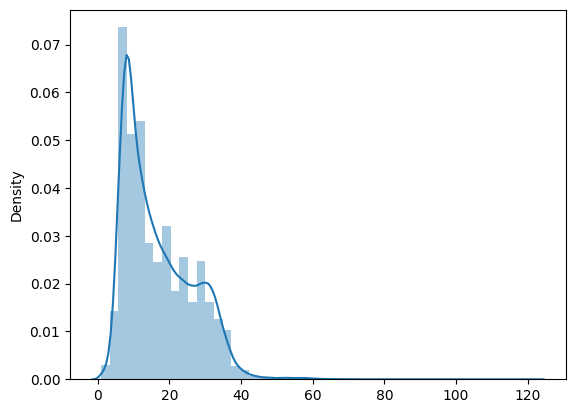

In [72]:
sns.distplot(train_lengths)

In [73]:
# видим большие выбросы в данных
# 97% наших текстов не больше вот стольки токенов
np.percentile(train_lengths, 95)

34.0

In [74]:
class TextClassificationDataset(Dataset):

    def __init__(self, texts, targets, vocab, pad_index=0, max_length=32):
        super().__init__()

        self.texts = texts
        self.targets = targets
        self.vocab = vocab

        self.pad_index = pad_index
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def tokenization(self, text):

        tokens = wordpunct_tokenize(text)

        token_indices = [self.vocab[tok] for tok in tokens if tok in self.vocab]

        return token_indices

    def padding(self, tokenized_text):

        tokenized_text = tokenized_text[:self.max_length]

        tokenized_text += [self.pad_index] * (self.max_length - len(tokenized_text))

        return tokenized_text

    def __getitem__(self, index):

        text = self.texts[index]
        target = self.targets[index]

        tokenized_text = self.tokenization(text)
        tokenized_text = self.padding(tokenized_text)

        tokenized_text = torch.tensor(tokenized_text)

        return tokenized_text, target

In [75]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)

In [76]:
x, y = train_dataset[0]
x

tensor([  32,    2, 7825,   37,   28,   23, 1750,   34,  548,   28,  383,    6,
        2842,   18,  106, 7825,    4,   36,    6, 4001,   93, 7825, 1967,    3,
           0,    0,    0,    0,    0,    0,    0,    0])

In [77]:
[index2token[idx.item()] for idx in x]

['are',
 'the',
 'filters',
 '?',
 'i',
 "'",
 'm',
 'not',
 'sure',
 'i',
 'want',
 'to',
 'replace',
 'with',
 'new',
 'filters',
 'and',
 'have',
 'to',
 'throw',
 'out',
 'filters',
 'frequently',
 '.',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD',
 'PAD']

In [78]:
train_dataset = TextClassificationDataset(texts=train_x, targets=train_y, vocab=vocab)
valid_dataset = TextClassificationDataset(texts=valid_x, targets=valid_y, vocab=vocab)

train_loader = DataLoader(train_dataset, batch_size=128)
valid_loader = DataLoader(valid_dataset, batch_size=128)

In [79]:
for x, y in train_loader:
    break

In [80]:
x.shape, y.shape

(torch.Size([128, 32]), torch.Size([128]))

### Как мы можем задавать слои

In [81]:
from torch import nn

In [82]:
embedding_layer = nn.Embedding(num_embeddings=len(vocab),
                               embedding_dim=embeddings.shape[-1],
                               padding_idx=0)

In [83]:
x_embed = embedding_layer(x)

In [84]:
x_embed

tensor([[[ 0.3990,  2.0343,  0.8458,  ...,  2.6843, -0.9754, -0.2186],
         [ 0.6628,  0.1396, -1.5942,  ...,  0.2245, -1.1631,  0.8478],
         [-0.9575, -0.2541,  1.0441,  ..., -0.7762,  0.8912,  0.8319],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.5090,  1.1398, -1.3063,  ..., -0.3240,  1.9764,  1.1135],
         [-1.0142,  1.2253, -0.5328,  ...,  0.2088,  0.9949,  0.7936],
         [-1.4308,  0.0331,  2.9958,  ...,  0.3234, -1.0332, -1.1682],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[-0.0169, -0.3396, -0.0844,  ..., -1.1962,  0.2051,  0.0782],
         [ 1.2218,  0.2403, -0.8048,  ..., -0

In [85]:
x_embed.shape

torch.Size([128, 32, 300])

### Но мы ведь прочитали нашу матрицу эмбеддингов
Таким образом она инициализируется предобученными весами.  
При такой инициализации по умолчанию она замораживается, внутри ```.from_pretrained(embeddings, padding_idx=0)``` есть флаг ```freeze```, который отвечает за необходимость заморозки весов. То есть эти веса в процессе обучения не будут обновляться.

In [86]:
embeddings = torch.tensor(embeddings).float()

In [87]:
embedding_layer = nn.Embedding.from_pretrained(embeddings, padding_idx=0)

In [88]:
x_embed = embedding_layer(x)

### Немного LSTM
Ниже будет про ```batch_first=True```

In [ ]:
lstm = nn.LSTM(input_size=300, hidden_size=128, num_layers=2, batch_first=True, dropout=0.3, bidirectional=True)

In [ ]:
x_lstm, _ = lstm(x_embed)

In [ ]:
# 256 потому что это конкатенация лстмки, которая прочитала текст слева направо
# и лстмки, которая прочитала текст справа налево
x_lstm.shape

In [ ]:
# избавились от временной размерности
x_lstm.mean(dim=1).shape

### Сделаем свою сеть
В первой домашке в конце есть более подробная информация почему мы используем классы.

In [ ]:
class DeepAverageNetwork(nn.Module):

    def __init__(self, embeddings, linear_1_size, linear_2_size, n_classes):
        super().__init__()

        self.embedding_layer = nn.Embedding.from_pretrained(embeddings, padding_idx=0)

        self.batch_norm = nn.BatchNorm1d(num_features=embeddings.shape[-1])

        self.linear_1 = nn.Linear(in_features=embeddings.shape[-1], out_features=linear_1_size)
        self.linear_2 = nn.Linear(in_features=linear_1_size, out_features=linear_2_size)
        self.linear_3 = nn.Linear(in_features=linear_2_size, out_features=n_classes)

    def forward(self, x):

        # переводим индексы слов в эмбеддинги этих слов
        # (batch_size, sequence_length) -> (batch_size, sequence_length, embedding_dim)
        x = self.embedding_layer(x)

        # агрегируем наши эмбеддинги по размерности время
        # (batch_size, sequence_length, embedding_dim) -> (batch_size, embedding_dim)
        x = x.sum(dim=1)

        # делаем нормирование
        # (batch_size, embedding_dim) -> (batch_size, embedding_dim)
        x = self.batch_norm(x)

        # прогоняем через первый линейный слой
        # (batch_size, embedding_dim) -> (batch_size, linear_1_size)
        x = self.linear_1(x)

        # применяем нелинейность
        # (batch_size, linear_1_size) -> (batch_size, linear_1_size)
        x = torch.relu(x)

        # прогоняем через второй линейный слой
        # (batch_size, linear_1_size) -> (batch_size, linear_2_size)
        x = self.linear_2(x)

        # применяем нелинейность
        # (batch_size, linear_2_size) -> (batch_size, linear_2_size)
        x = torch.relu(x)

        # переводим с помощью линейного преобразования в количество классов
        # (batch_size, linear_2_size) -> (batch_size, n_classes)
        x = self.linear_3(x)

        ## по идеи здесь должен был быть софтмакс
        ## но мы будем использовать лосс nn.CrossEntropyLoss()
        ## в его документации написано
        ## This criterion combines :func:`nn.LogSoftmax` and :func:`nn.NLLLoss` in one single class.
        ## это некоторая оптимизация, которая включает в себя сразу и софтмакс и сам negative log likelihood лосс
        ## так как у нас в лоссе есть софтмакс, то мы не будем применять его в сетке
        ## на этапе предсказания (а не обучения) мы будем отдельно делать софтмакс для получения распределения классов
        ##
        ## (batch_size, n_classes) -> (batch_size, n_classes)
        # x = torch.softmax(x, dim=-1)

        return x

In [ ]:
model = DeepAverageNetwork(embeddings=embeddings,
                           linear_1_size=256,
                           linear_2_size=128,
                           n_classes=len(category2index))

In [ ]:
criterion = nn.CrossEntropyLoss()

# задайте оптимизатор
# optimizer = ...

### Напишите цикл обучения
Что он должен в себя включать:
1. Получение предсказаний модели
1. Расчет функции потерь
1. Расчет градиентов
1. Шаг градиентного спуска
1. Обнуление градиентов
1. Записывание значения лосса

In [ ]:
losses = list()

# в обучении моделей у нас есть такая ситуация, что некоторые слои ведут себя по разному на этапе тренировки и предсказания
# например, батч норм (а так же все остальные нормировки) и дропаут
# это переводит модель в режим тренировки
model.train()

for x, y in train_loader:

    ...

### Напишите цикл валидации
Что он должен в себя включать:
1. Получение предсказаний модели
1. Расчет функции потерь
1. Записывание значения лосса

Также с помощью контекста ```with torch.no_grad():``` можно явно указать торчу не сохранять необходимые параметры для расчета градиентов. Обязательно для режима предсказания.

In [ ]:
losses = list()

# это переводит модель в режим предсказания
# то есть фиксируются статистики батч норма, дропаут не выкидывает фичи
model.eval()

# заметьте, что мы поменяли наш лоадер на валидационный
for x, y in valid_loader:

    with torch.no_grad():
        # получение предсказаний модели
        # расчет лосса
        ...

    ...

### Проведите обучение несколько эпох
Одна эпоха - это один проход по датасету.  
Шаги:
- Поменяйте что-нибудь в модели, добавить дропаут и тд
- Остановите обучение с помощью early stopping
- Добавьте расчет метрик во время обучения и предсказания (например, micro F1). Чтобы это сделать вы можете, например, сохранять предсказания модели
- После обучения нарисуйте как по мере обучения меняется функция потерь на тренировочном и валидационном датасете, как меняется метрики
- Опционально: постройте confusion matrix

Подсказки:
- Чтобы корректно сохранять предсказания нужно переменную отсоединить от графа, то есть сделать ```x.detach()```

In [ ]:
for n_epoch in range(2):
    ...

### Важные и не очень интуитивные моменты про LSTM в торче

По умолчанию LSTM принимает данные с такой размерностью:
```python
(seq_len, batch, input_size)
```
Сделано это с целью оптимизации на более низком уровне.  
Мы оперируем такими объектами:
```python
(batch, seq_len, input_size)
```
Чтобы LSTM у нас заработала правильно, мы можем либо передать параметр ```batch_first=True``` во время инициализации слоя,
либо транспонировать (поменять) первую и вторую размерность у нашего x перед подачей в слой.  
[Подробнее про LSTM](https://pytorch.org/docs/stable/nn.html#lstm)

- 128 - размер батча
- 64 - длина последовательности (количество слов)
- 1024 - эмбеддинг слова

In [ ]:
x = torch.rand(128, 64, 1024)

In [ ]:
# первый способ
lstm = torch.nn.LSTM(1024, 512, batch_first=True)

pred, mem = lstm(x)

In [ ]:
pred.shape

In [ ]:
# второй способ
lstm = torch.nn.LSTM(1024, 512)

# меняем размерность batch и seq_len местами
x_transposed = x.transpose(0, 1)
pred_transposed, mem = lstm(x_transposed)

In [ ]:
# у нас все еще осталась размерность (seq_len, batch, input_size)
pred_transposed.shape

In [ ]:
# просто транспонируем еще раз
pred = pred_transposed.transpose(0, 1)
pred.shape

### Еще важный момент про LSTM

The input can also be a packed variable length sequence. See [torch.nn.utils.rnn.pack_padded_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_padded_sequence) or [torch.nn.utils.rnn.pack_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_sequence) for details.

Это внутренняя конструкция торча, которая позволяет не читать токен ```PAD```, но все еще работать с батчами. То есть внутри батча мы можем передать лстмке, что у нас данные переменной длины. Не забудьте что на выход отдается [torch.nn.utils.rnn.PackedSequence](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.PackedSequence).

## Домашнее задание

1. Сделать класс нейронки, вписать необходимые операции, архитектура ниже
1. Написать обучалку (обобщить то, что было выше)
1. Добавить логирование
    1. Сохранять лосс на каждой итерции обучения __0.25 балла__
    1. Каждую эпоху сохранять лосс трейна и тест __0.25 балла__
    1. Каждую эпоху рассчитывать метрики __0.25 балла__
    1. Добавить прогресс бар, в котором показывается усредненный лосс последних 500-та итераций __0.25 балла__
1. Добавить early stopping __0.5 балла__
1. Нарисовать графики лосса, метрик, конфьюжин матрицу __0.5 балла__


### Архитектура (что можно попробовать)
1. Предобученные эмбеддинги. Почитайте [здесь](https://pytorch.org/docs/stable/nn.html#embedding) (from_pretrained) как вставить свои эмбеддинги, выше мы читали матрицу эмбеддингов. __0 баллов__
1. Дообучить эмбеддинги вместе с сетью и с другим learning rate (указывается в оптимизаторе). __2 балла__
1. Bidirectional LSTM. __1 балл__
1. Написать правильный правильный mean/max пулинг, который не учитывает паддинги, точнее их маскирует. __2 балла__
1. Добавить [torch.nn.utils.rnn.pack_padded_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_padded_sequence) и [torch.nn.utils.rnn.pack_sequence()](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_sequence) для LSTM. Инфа [здесь](#Еще-важный-момент-про-LSTM) __2 балла__
1. Добавить spatial дропаут для входа LSTM (не просто стандартный пункт при инициализации LSTM) __1 балл__
1. Добавить BatchNorm/LayerNorm/Dropout/Residual/etc __2 балл__
1. Добавить шедуллер __1 балл__
1. Обучать на GPU __2 балла__
1. your madness

## 10 баллов максимум

# По итогам напишите результаты экспериментов
# Что получилось, а что нет
# Почему, выводы

In [101]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [107]:
class MyNetwork(nn.Module):
    def __init__(self, embeddings, lstm_hidden_size, linear_1_size, linear_2_size, n_classes):
        super(MyNetwork, self).__init__()
        self.embedding_layer = nn.Embedding.from_pretrained(embeddings, padding_idx=0, freeze=False)

        # Bidirectional LSTM
        self.lstm = nn.LSTM(input_size=embeddings.shape[1], hidden_size=lstm_hidden_size,
                            bidirectional=True, batch_first=True)

        # Spatial Dropout
        self.spatial_dropout = nn.Dropout2d(0.3)

        # BatchNorm
        self.batch_norm = nn.BatchNorm1d(num_features=lstm_hidden_size * 4)

        # линейные слои после LSTM
        self.linear_1 = nn.Linear(lstm_hidden_size * 4, linear_1_size)
        self.linear_2 = nn.Linear(linear_1_size, linear_2_size)
        self.linear_3 = nn.Linear(linear_2_size, n_classes)

    def forward(self, x, lengths):
        x = self.embedding_layer(x)
        # Spatial Dropout
        x = self.spatial_dropout(x.unsqueeze(1)).squeeze(1)

        # pack_padded_sequence и pad_packed_sequenc
        x = pack_padded_sequence(x, lengths.cpu(), batch_first=True, enforce_sorted=False)
        x, _ = self.lstm(x)
        x, _ = pad_packed_sequence(x, batch_first=True)

        # mean, max poolings
        mask = (x.sum(dim=2) != 0).float()
        x_mean = (x * mask.unsqueeze(-1)).sum(dim=1) / mask.sum(dim=1, keepdim=True)
        x_max, _ = (x * mask.unsqueeze(-1)).max(dim=1)
        x = torch.cat([x_mean, x_max], dim=1)

        # batch norm, линейные слои
        x = self.batch_norm(x)
        x = F.relu(self.linear_1(x))
        x = F.relu(self.linear_2(x))
        x = self.linear_3(x)

        return x


In [110]:
model = MyNetwork(embeddings=embeddings,
                           lstm_hidden_size=256,
                           linear_1_size=256,
                           linear_2_size=128,
                           n_classes=len(category2index))

Iteration [500/1954], Average loss: 1.2835
Iteration [1000/1954], Average loss: 1.1807
Iteration [1500/1954], Average loss: 1.1640
Epoch [1/10], Loss: 1.1937
Iteration [500/1954], Average loss: 1.1008
Iteration [1000/1954], Average loss: 1.0748
Iteration [1500/1954], Average loss: 1.0780
Epoch [2/10], Loss: 1.0814
Iteration [500/1954], Average loss: 1.0478
Iteration [1000/1954], Average loss: 1.0248
Iteration [1500/1954], Average loss: 1.0195
Epoch [3/10], Loss: 1.0268
Iteration [500/1954], Average loss: 0.9897
Iteration [1000/1954], Average loss: 0.9760
Iteration [1500/1954], Average loss: 0.9772
Epoch [4/10], Loss: 0.9756
Iteration [500/1954], Average loss: 0.9471
Iteration [1000/1954], Average loss: 0.9305
Iteration [1500/1954], Average loss: 0.9299
Epoch [5/10], Loss: 0.9327
Iteration [500/1954], Average loss: 0.9030
Iteration [1000/1954], Average loss: 0.8871
Iteration [1500/1954], Average loss: 0.8886
Epoch [6/10], Loss: 0.8907
Iteration [500/1954], Average loss: 0.8644
Iteration

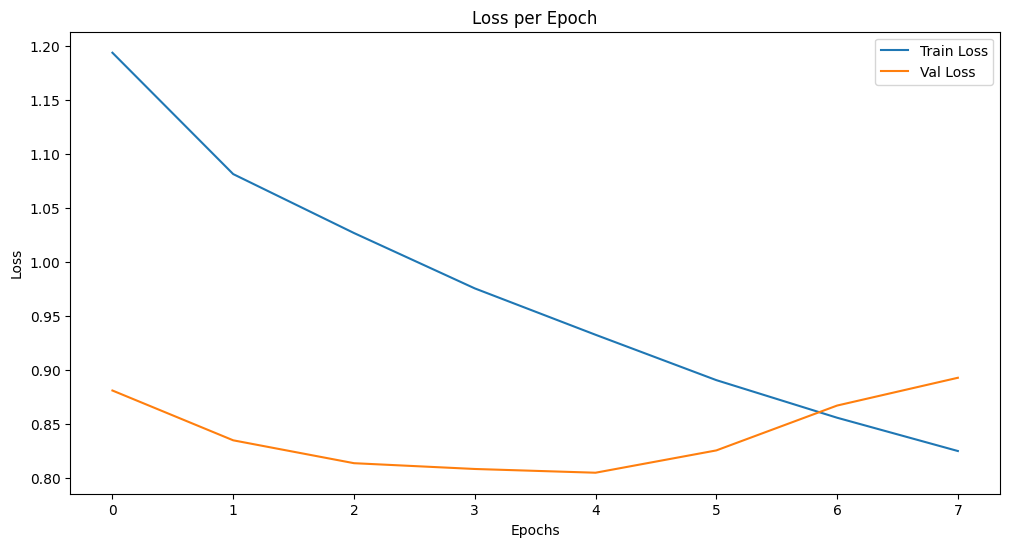

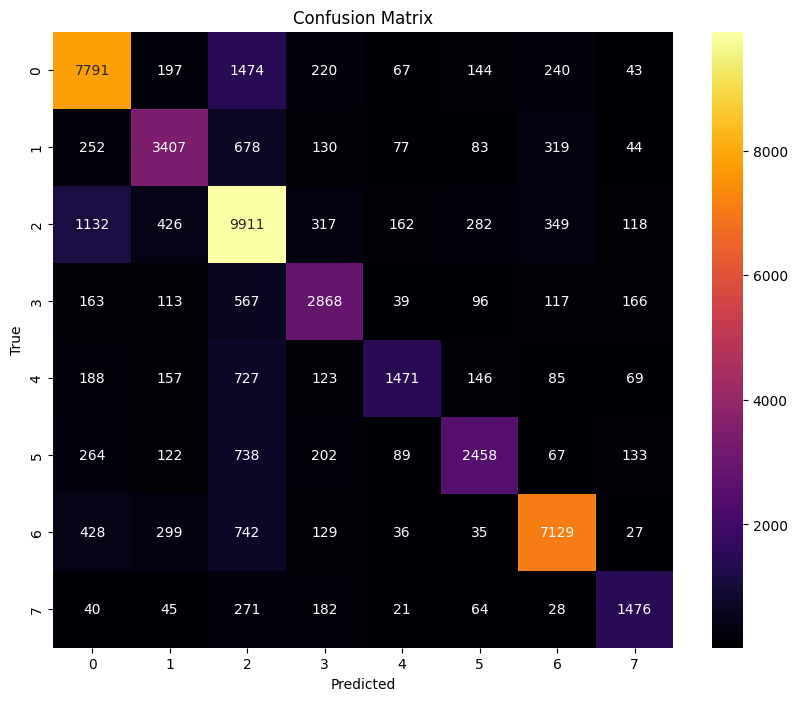

In [111]:
learning_rate = 0.001
num_epochs = 10
early_stopping_patience = 3  # сколько нужно эпох без улучшения для остановки
train_losses = []
val_losses = []
metrics = []

optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

# обучаем на gpu, если получится
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# цикл обучения
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    running_loss = []

    #обучение
    for i, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        # обнуление градиентов
        optimizer.zero_grad()
        lengths = (x != 0).sum(dim=1)

        # отфильтруем последовательности с нулевой длиной
        if torch.any(lengths == 0):
            mask = lengths > 0
            x, y, lengths = x[mask], y[mask], lengths[mask]

        predictions = model(x, lengths)
        loss = criterion(predictions, y)
        loss.backward()
        optimizer.step()

        # запишем loss
        epoch_loss += loss.item()
        running_loss.append(loss.item())

        # логирование
        if i % 500 == 499:  # каждые 500 итераций
            avg_running_loss = np.mean(running_loss[-500:])
            print(f'Iteration [{i + 1}/{len(train_loader)}], Average loss: {avg_running_loss:.4f}')

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # валидацмя
    model.eval()
    val_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
      for x_val, y_val in valid_loader:
          x_val, y_val = x_val.to(device), y_val.to(device)
          lengths = (x_val != 0).sum(dim=1)

          # опять отфильтруем последовательности с нулевой длиной
          if torch.any(lengths == 0):
              mask = lengths > 0
              x_val, y_val, lengths = x_val[mask], y_val[mask], lengths[mask]

          if len(x_val) == 0:
              continue  # пропускаем батч, если после фильтрации не осталось последовательностей

          predictions = model(x_val, lengths)
          loss = criterion(predictions, y_val)
          val_loss += loss.item()
          all_preds.extend(predictions.argmax(dim=1).cpu().numpy())
          all_labels.extend(y_val.cpu().numpy())


    avg_val_loss = val_loss / len(valid_loader)
    val_losses.append(avg_val_loss)

    # метрики
    report = classification_report(all_labels, all_preds, output_dict=True)
    metrics.append(report)

    # early stopping
    if epoch > 0 and val_losses[-1] > val_losses[-2]:
        early_stopping_patience -= 1
        if early_stopping_patience == 0:
            print("Early stopping triggered.")
            break
    else:
        early_stopping_patience = 3  # сбрасываем счетчик

# графики
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

# конфьюжн матрица
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [114]:
#metrics

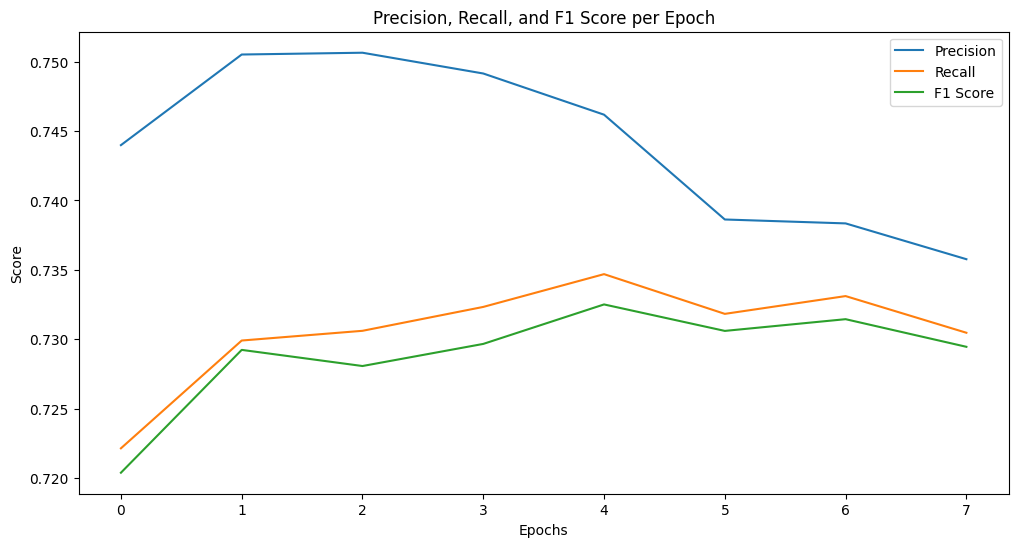

In [112]:
# метрики
precision_scores = [m['weighted avg']['precision'] for m in metrics]
recall_scores = [m['weighted avg']['recall'] for m in metrics]
f1_scores = [m['weighted avg']['f1-score'] for m in metrics]

# графики для метрик
plt.figure(figsize=(12, 6))
plt.plot(precision_scores, label='Precision')
plt.plot(recall_scores, label='Recall')
plt.plot(f1_scores, label='F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score per Epoch')
plt.legend()
plt.show()

теперь попробуем добавить шедуллер (ReduceLROnPlateau): пусть он в конце каждой эпохи будет передавать средний val_loss для контроля изменения learning rate

Iteration [500/1954], Average loss: 0.7874
Iteration [1000/1954], Average loss: 0.8074
Iteration [1500/1954], Average loss: 0.8111
Epoch [1/10], Loss: 0.8000
Iteration [500/1954], Average loss: 0.7769
Iteration [1000/1954], Average loss: 0.7835
Iteration [1500/1954], Average loss: 0.7795
Epoch [2/10], Loss: 0.7794
Iteration [500/1954], Average loss: 0.7608
Iteration [1000/1954], Average loss: 0.7700
Iteration [1500/1954], Average loss: 0.7645
Epoch [3/10], Loss: 0.7624
Iteration [500/1954], Average loss: 0.7498
Iteration [1000/1954], Average loss: 0.7469
Iteration [1500/1954], Average loss: 0.7488
Epoch [4/10], Loss: 0.7459
Early stopping triggered.


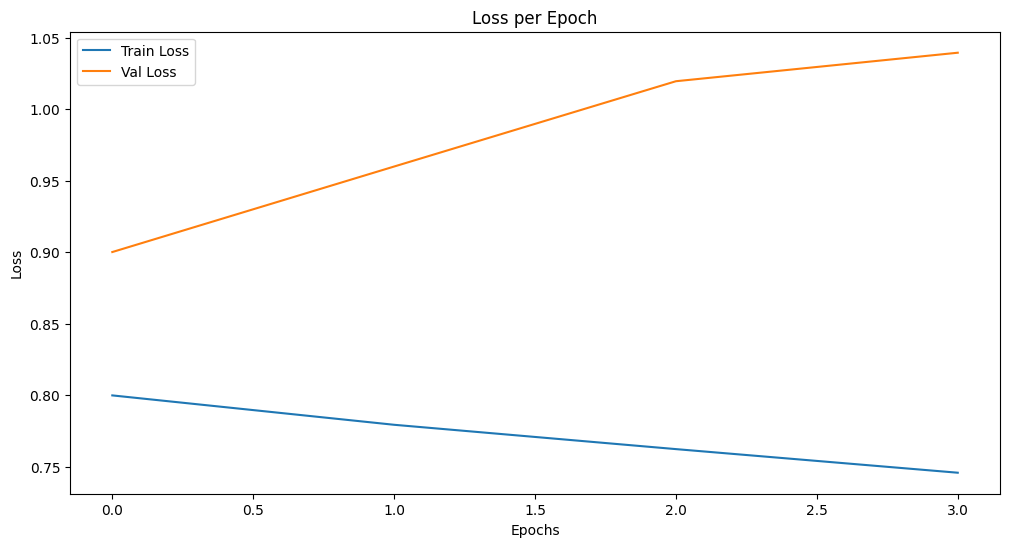

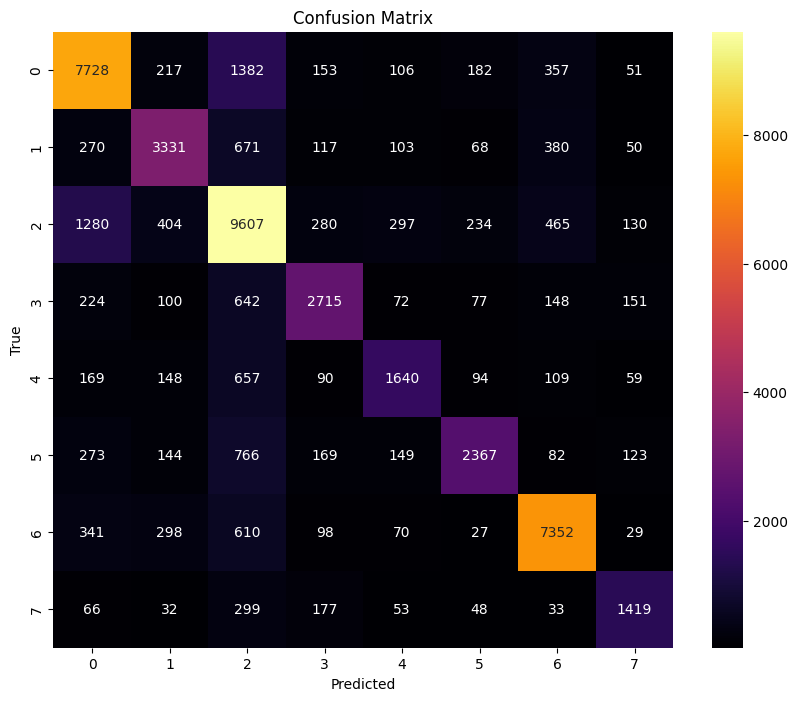

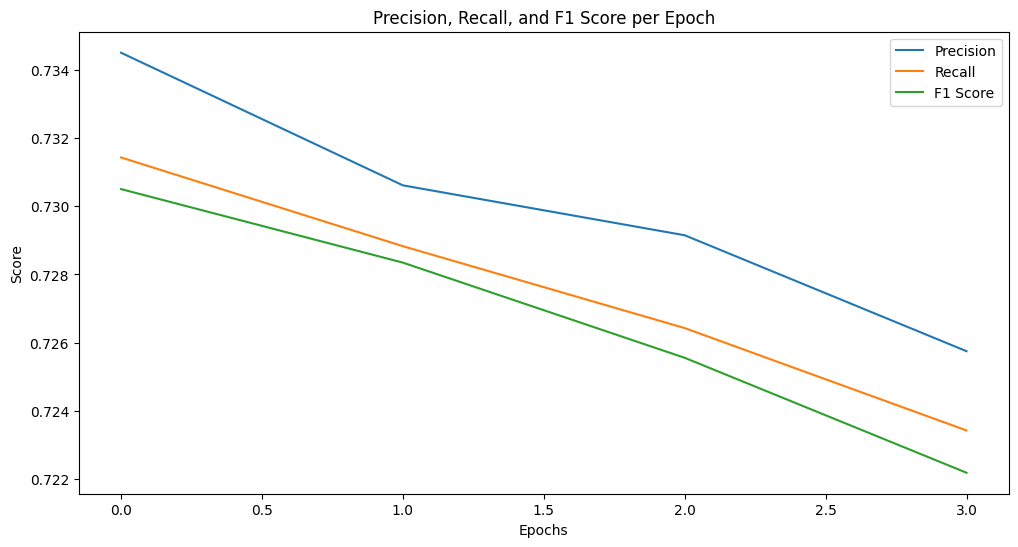

In [116]:
learning_rate = 0.001
num_epochs = 10
early_stopping_patience = 3  # сколько нужно эпох без улучшения для остановки
train_losses = []
val_losses = []
metrics = []

optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)
criterion = nn.CrossEntropyLoss()


# обучаем на gpu, если получится
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# цикл обучения
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    running_loss = []

    #обучение
    for i, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        # обнуление градиентов
        optimizer.zero_grad()
        lengths = (x != 0).sum(dim=1)

        # отфильтруем последовательности с нулевой длиной
        if torch.any(lengths == 0):
            mask = lengths > 0
            x, y, lengths = x[mask], y[mask], lengths[mask]

        predictions = model(x, lengths)
        loss = criterion(predictions, y)
        loss.backward()
        optimizer.step()

        # запишем loss
        epoch_loss += loss.item()
        running_loss.append(loss.item())

        # логирование
        if i % 500 == 499:  # каждые 500 итераций
            avg_running_loss = np.mean(running_loss[-500:])
            print(f'Iteration [{i + 1}/{len(train_loader)}], Average loss: {avg_running_loss:.4f}')

    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}")

    # валидацмя
    model.eval()
    val_loss = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
      for x_val, y_val in valid_loader:
          x_val, y_val = x_val.to(device), y_val.to(device)
          lengths = (x_val != 0).sum(dim=1)

          # опять отфильтруем последовательности с нулевой длиной
          if torch.any(lengths == 0):
              mask = lengths > 0
              x_val, y_val, lengths = x_val[mask], y_val[mask], lengths[mask]

          if len(x_val) == 0:
              continue  # пропускаем батч, если после фильтрации не осталось последовательностей

          predictions = model(x_val, lengths)
          loss = criterion(predictions, y_val)
          val_loss += loss.item()
          all_preds.extend(predictions.argmax(dim=1).cpu().numpy())
          all_labels.extend(y_val.cpu().numpy())


    avg_val_loss = val_loss / len(valid_loader)
    val_losses.append(avg_val_loss)

    # метрики
    report = classification_report(all_labels, all_preds, output_dict=True)
    metrics.append(report)

    scheduler.step(avg_val_loss)

    # early stopping
    if epoch > 0 and val_losses[-1] > val_losses[-2]:
        early_stopping_patience -= 1
        if early_stopping_patience == 0:
            print("Early stopping triggered.")
            break
    else:
        early_stopping_patience = 3  # сбрасываем счетчик

# графики
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

# конфьюжн матрица
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# метрики
precision_scores = [m['weighted avg']['precision'] for m in metrics]
recall_scores = [m['weighted avg']['recall'] for m in metrics]
f1_scores = [m['weighted avg']['f1-score'] for m in metrics]

# графики для метрик
plt.figure(figsize=(12, 6))
plt.plot(precision_scores, label='Precision')
plt.plot(recall_scores, label='Recall')
plt.plot(f1_scores, label='F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score per Epoch')
plt.legend()
plt.show()

кажется, случилось переобучение... (train loss падает, val loss растет, метрики тоже ухудшаются с каждой эпохой)